In [15]:
#!/usr/bin/env python3

# Data Handling
import pandas as pd  # noqa: F401
import numpy as np  # noqa: F401

# Visualization
import matplotlib.pyplot as plt  # noqa: F401
import seaborn as sns

# Machine Learning - preprocessing & evaluation
from sklearn.model_selection import train_test_split  # noqa: F401
from sklearn.metrics import mean_squared_error, r2_score  # noqa: F401

# ML Models
from sklearn.linear_model import LinearRegression  # noqa: F401
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # noqa: F401
import xgboost as xgb  # noqa: F401

# Style for plots
sns.set(style="whitegrid")


In [16]:
# Step 2: Load Dataset
df = pd.read_csv('laptop_prices.csv')
print('Shape:', df.shape)
df.head()

Shape: (1275, 23)


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


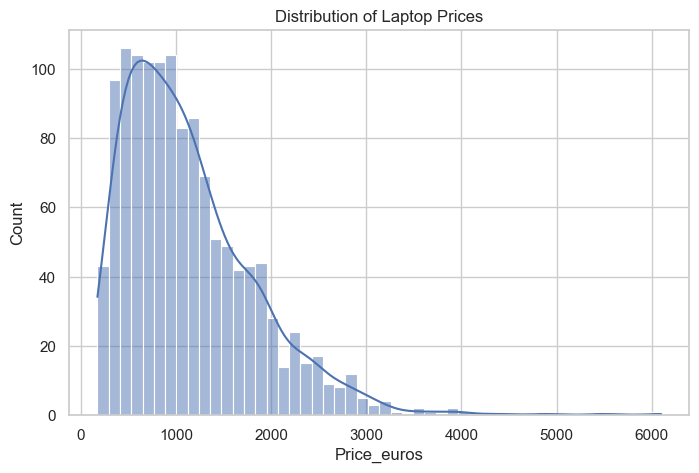

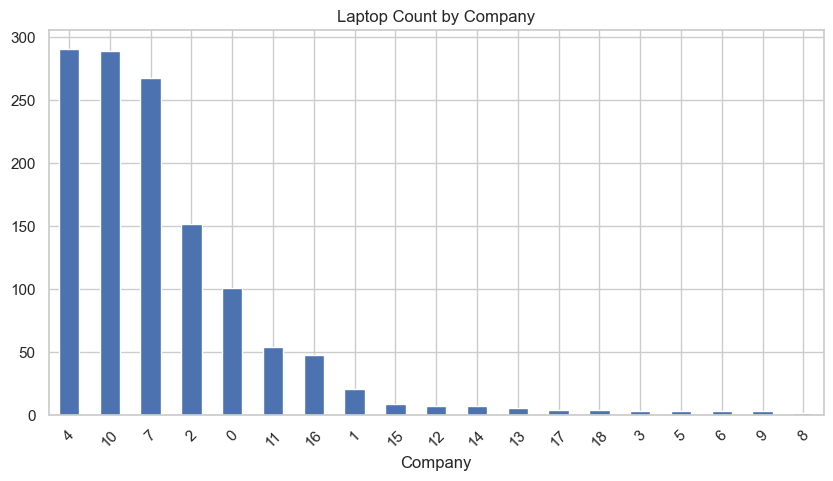

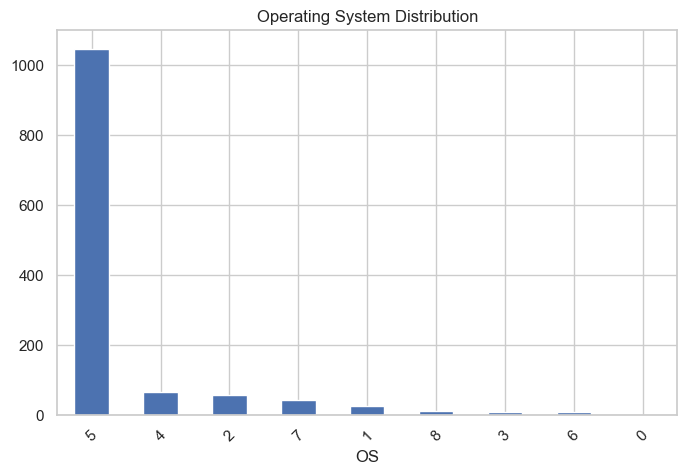

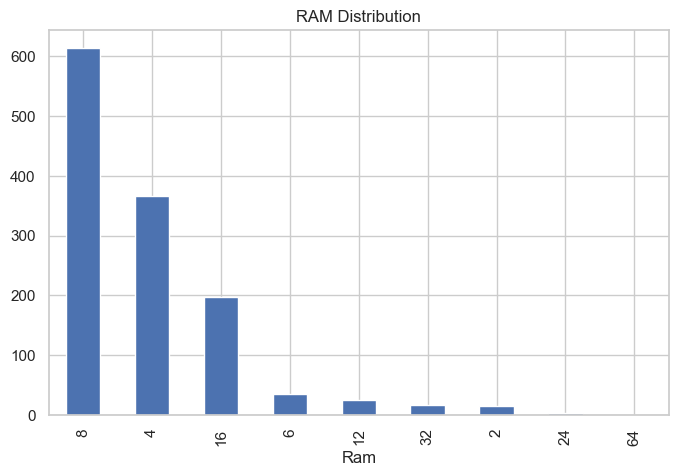

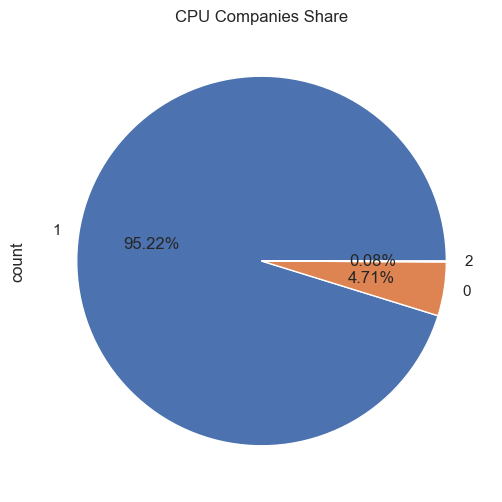

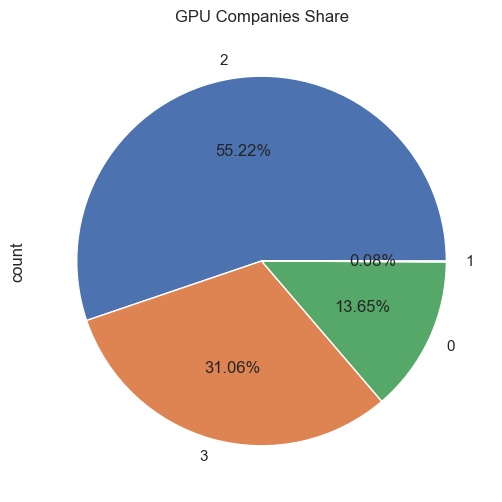

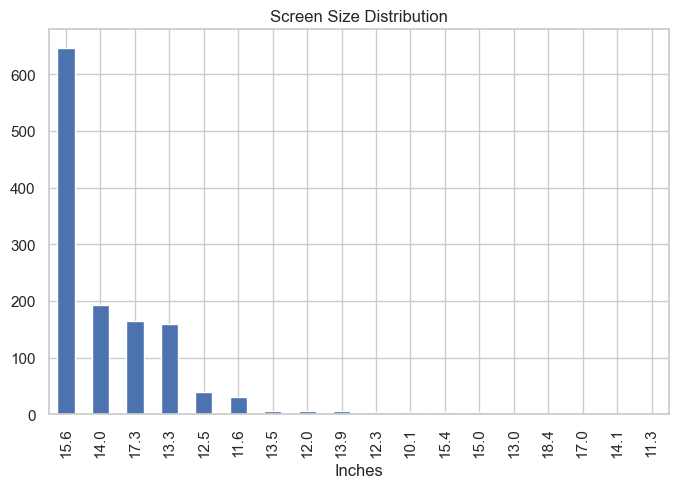

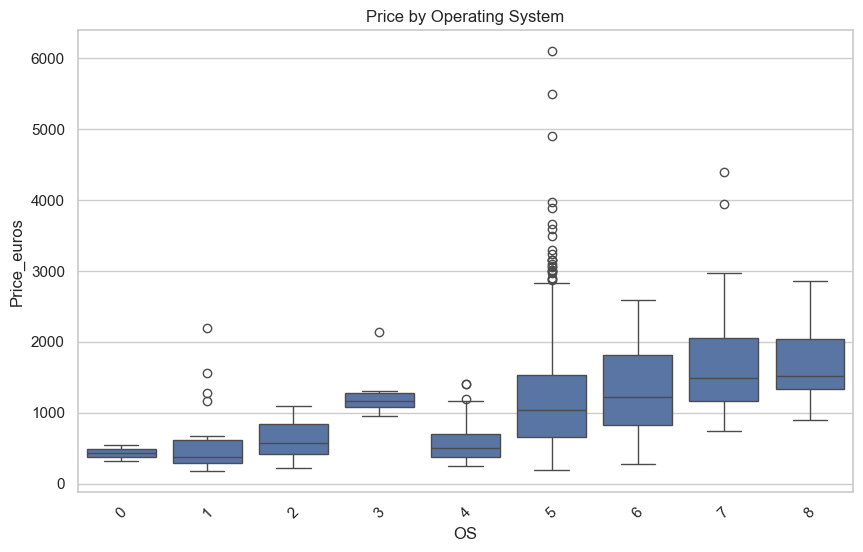

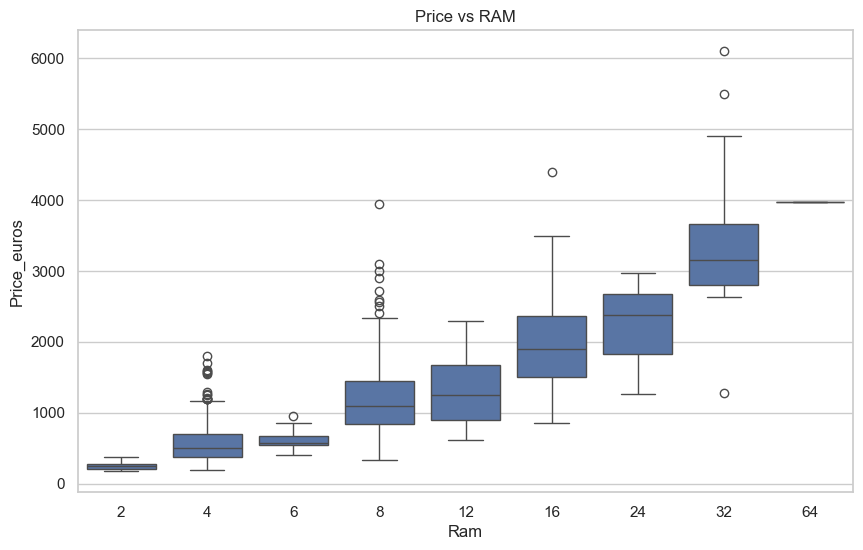

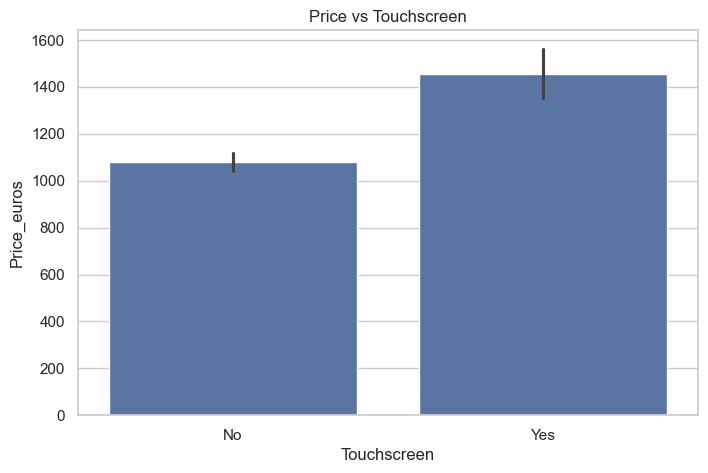

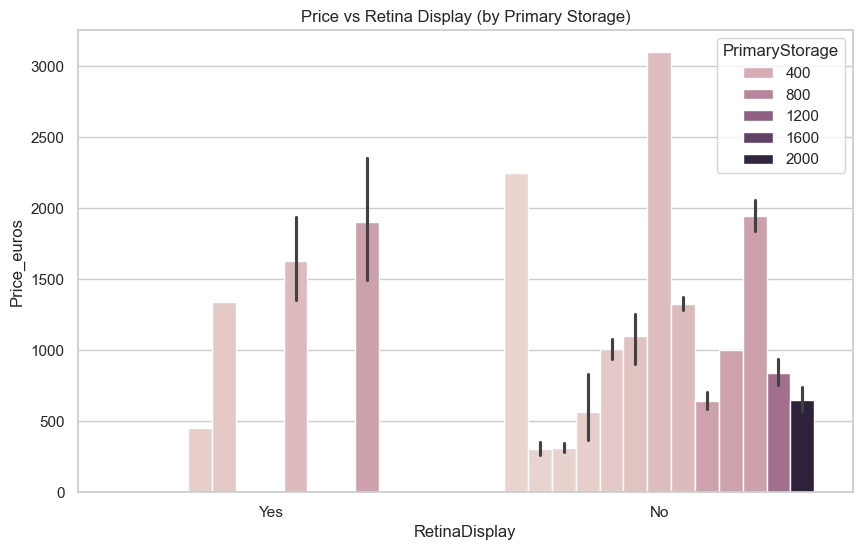

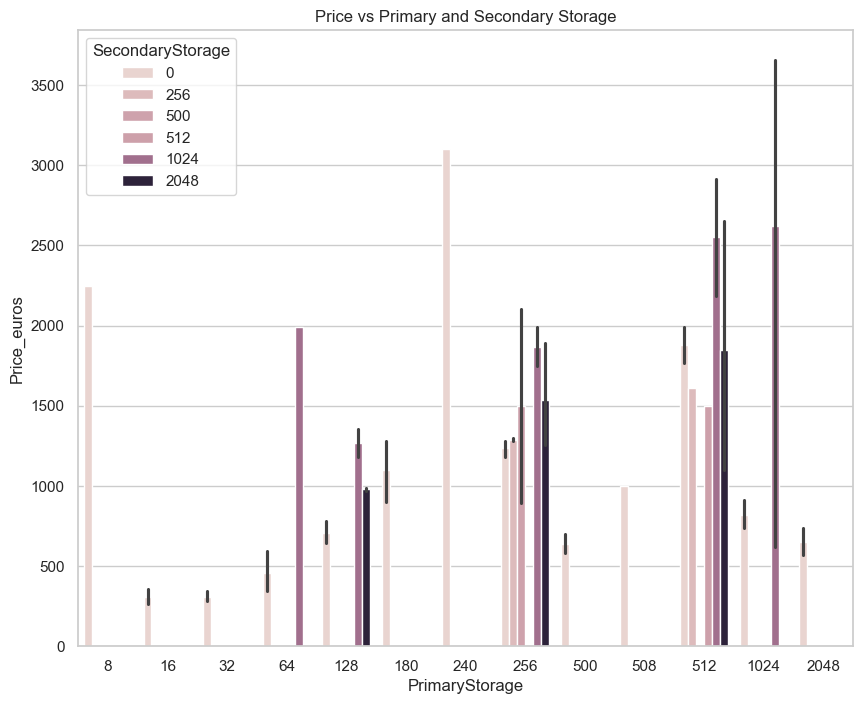

In [28]:
# =====================
# Step 3: Exploratory Data Analysis (EDA)
# =====================

# 1. Distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], bins=50, kde=True)
plt.title("Distribution of Laptop Prices")
plt.show()

# 2. Laptop brands
plt.figure(figsize=(10,5))
df['Company'].value_counts().plot(kind='bar')
plt.title("Laptop Count by Company")
plt.xticks(rotation=45)
plt.show()

# 3. Operating System distribution
plt.figure(figsize=(8,5))
df['OS'].value_counts().plot(kind='bar')
plt.title("Operating System Distribution")
plt.xticks(rotation=45)
plt.show()

# 4. RAM distribution
plt.figure(figsize=(8,5))
df['Ram'].value_counts().plot(kind='bar')
plt.title("RAM Distribution")
plt.show()

# 5. CPU Companies
df['CPU_company'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6,6))
plt.title("CPU Companies Share")
plt.show()

# 6. GPU Companies
df['GPU_company'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6,6))
plt.title("GPU Companies Share")
plt.show()

# 7. Screen Sizes
plt.figure(figsize=(8,5))
df['Inches'].value_counts().plot(kind='bar')
plt.title("Screen Size Distribution")
plt.show()

# 8. Price vs Operating System
plt.figure(figsize=(10,6))
sns.boxplot(x="OS", y="Price_euros", data=df)
plt.title("Price by Operating System")
plt.xticks(rotation=45)
plt.show()

# 9. Price vs RAM
plt.figure(figsize=(10,6))
sns.boxplot(x="Ram", y="Price_euros", data=df)
plt.title("Price vs RAM")
plt.show()

# 10. Price vs Touchscreen
plt.figure(figsize=(8,5))
sns.barplot(x="Touchscreen", y="Price_euros", data=df)
plt.title("Price vs Touchscreen")
plt.show()

# 11. Price vs Retina Display + Storage
plt.figure(figsize=(10,6))
sns.barplot(x="RetinaDisplay", y="Price_euros", hue="PrimaryStorage", data=df)
plt.title("Price vs Retina Display (by Primary Storage)")
plt.show()

# 12. Price vs Primary and Secondary Storage
plt.figure(figsize = (10,8))
sns.barplot(x=df['PrimaryStorage'], y=df['Price_euros'], hue=df['SecondaryStorage'])
plt.title("Price vs Primary and Secondary Storage")
plt.show()


In [24]:
# a. Handle Missing Values
print("Missing values before:\n", df.isnull().sum())
df = df.dropna()  # you could also fill with median/most frequent if needed
print("\nMissing values after:\n", df.isnull().sum())

# b. Convert Categorical Data to Numerical
from sklearn.preprocessing import LabelEncoder

# Columns with categorical values
categorical_cols = ['Company', 'CPU_company', 'GPU_company', 'OS', 'TypeName']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# c. Feature Selection
# You can expand features list as needed
features = [
    'Company', 'CPU_company', 'GPU_company', 'Ram', 'PrimaryStorage',
    'SecondaryStorage', 'Inches', 'Weight', 'CPU_freq'
]

target = 'Price_euros'

X = df[features]
y = df[target]

print("Features:", features)
print("Target:", target)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Missing values before:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Missing values after:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
Ret

In [18]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (1020, 9) Test shape: (255, 9)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Define models
lin_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# ✅ Training (fit)
lin_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
# ✅ Prediction
lin_preds = lin_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

results = {
    "Linear Regression": {
        "MSE": mean_squared_error(y_test, lin_preds),
        "R2": r2_score(y_test, lin_preds)
    },
    "Random Forest": {
        "MSE": mean_squared_error(y_test, rf_preds),
        "R2": r2_score(y_test, rf_preds)
    },
    "Gradient Boosting": {
        "MSE": mean_squared_error(y_test, gb_preds),
        "R2": r2_score(y_test, gb_preds)
    },
    "XGBoost": {
        "MSE": mean_squared_error(y_test, xgb_preds),
        "R2": r2_score(y_test, xgb_preds)
    }
}

results_df = pd.DataFrame(results).T
results_df


,MSE,R2
Linear Regression,164117.507075,0.669344
Random Forest,72320.778680,0.854292
Gradient Boosting,74600.530862,0.849699
XGBoost,81150.129492,0.836503


C:\Users\itzme\AppData\Local\Temp\ipykernel_8696\2561651842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")


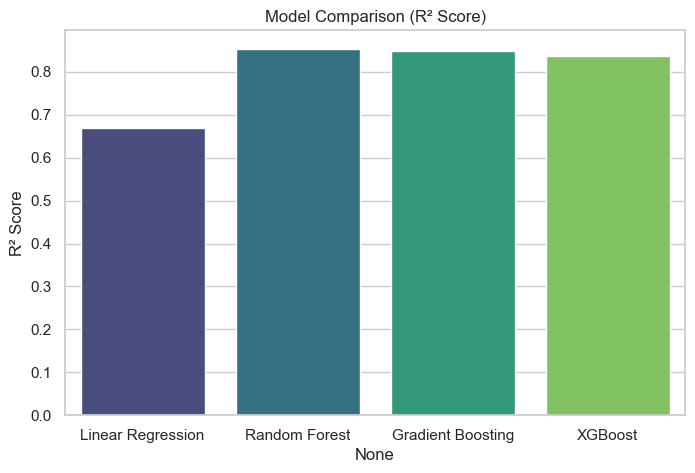

C:\Users\itzme\AppData\Local\Temp\ipykernel_8696\2561651842.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MSE"], palette="mako")


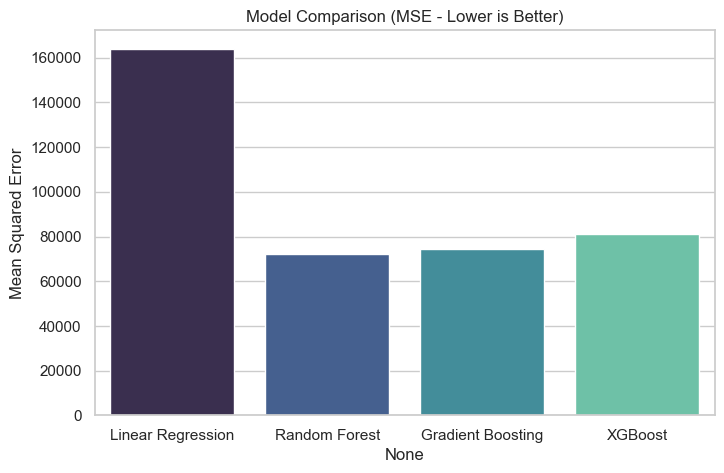

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="mako")
plt.title("Model Comparison (MSE - Lower is Better)")
plt.ylabel("Mean Squared Error")
plt.show()


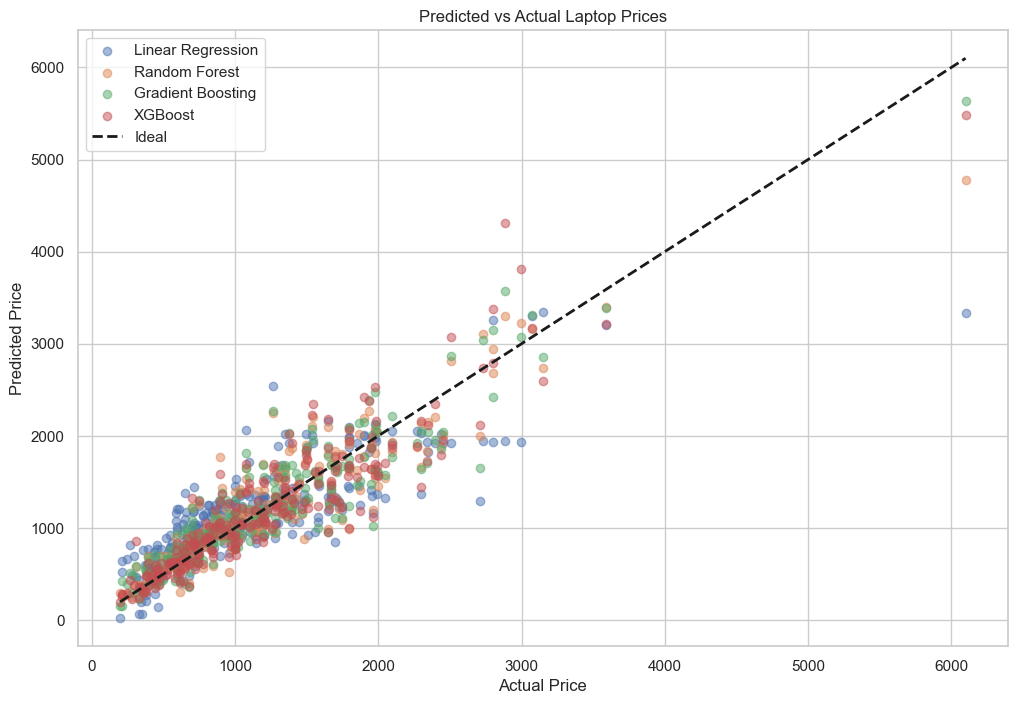

In [22]:
# Visualize Predicted vs Actual Values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, lin_preds, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_preds, alpha=0.5, label='Random Forest')
plt.scatter(y_test, gb_preds, alpha=0.5, label='Gradient Boosting')
plt.scatter(y_test, xgb_preds, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Laptop Prices')
plt.legend()
plt.show()

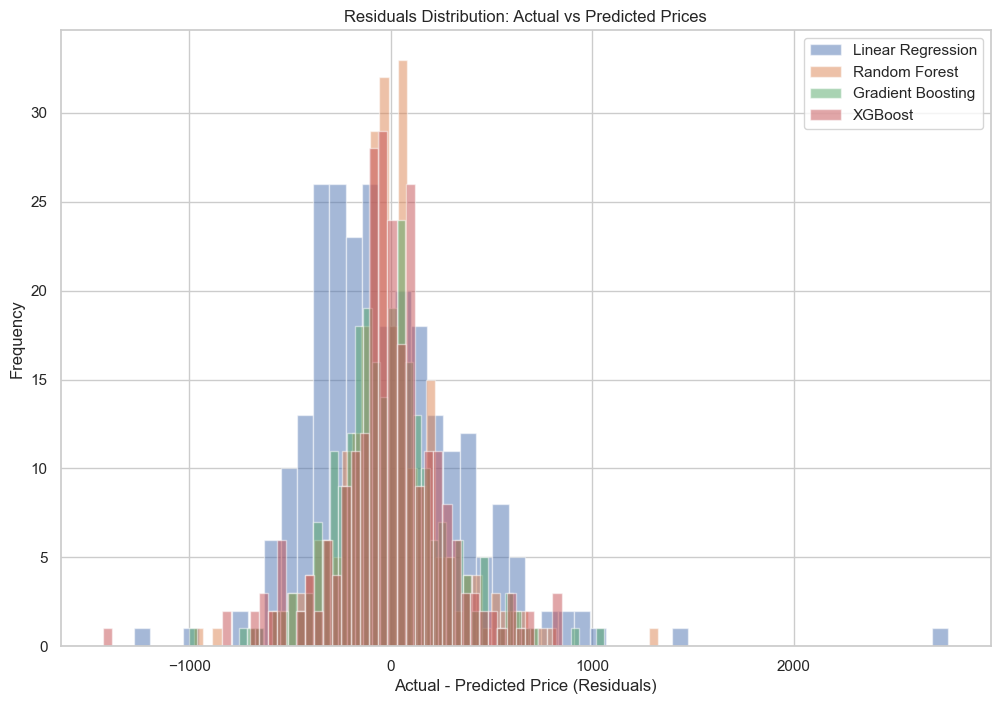

In [14]:
# Residuals (Diff) Plot: Actual - Predicted
plt.figure(figsize=(12, 8))
plt.hist(y_test - lin_preds, bins=50, alpha=0.5, label='Linear Regression')
plt.hist(y_test - rf_preds, bins=50, alpha=0.5, label='Random Forest')
plt.hist(y_test - gb_preds, bins=50, alpha=0.5, label='Gradient Boosting')
plt.hist(y_test - xgb_preds, bins=50, alpha=0.5, label='XGBoost')
plt.xlabel('Actual - Predicted Price (Residuals)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution: Actual vs Predicted Prices')
plt.legend()
plt.show()

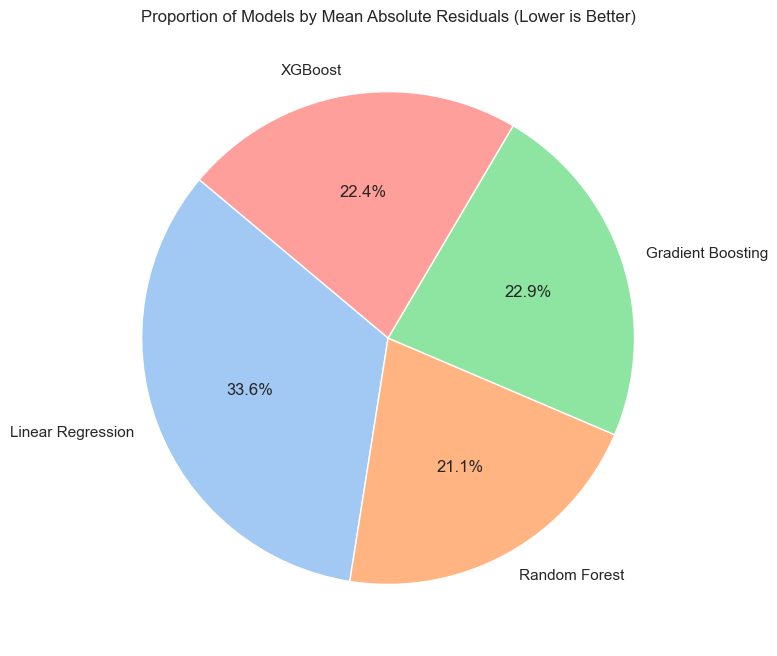

In [31]:
# Pie Chart: Proportion of Models by Mean Absolute Residuals
import numpy as np
mean_abs_residuals = residuals_df.abs().mean()
labels = mean_abs_residuals.index
sizes = mean_abs_residuals.values
colors = sns.color_palette('pastel')[0:len(labels)]
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Models by Mean Absolute Residuals (Lower is Better)')
plt.show()

In [32]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rf_model, "best_model.pkl")
print("Model saved as best_model.pkl")


Model saved as best_model.pkl
